## Simulated Annealing 

The goal of simulated annealing is to maximize the performance of a model relative to a fitness function defined over the model parameters you are seeking to optimize. In Exercise 2, you will apply simulated annealing coded in scipy to a one-dimensional problem in which you seek the value of X that maximizes the output of a function called fitnessFunction. But first you must write code that implements the function, which is the product of m and n: 
  
  
           m = 1+ cos(0.04v)2	 n = exp(−v2 /(20000))	

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def fitness(v):
    m = 1+np.cos(0.04*v)**2
    n = np.exp(-v**2/20000)
    return m*n

In [32]:
import numpy as np
alpha = 0.3
x = np.random.rand(8)
x = np.linalg.norm(x)
gradient_f = lambda x: 2*x
f_= lambda x: x**2
k = 0 
while gradient_f(x) >0.01 :
    x= x-alpha*gradient_f(x)
    k +=1
    ff = f_(x)
    print('iter = ', k)
    print('x =', x)
    print('f(x)= ', ff)

iter =  1
x = 0.8107435493910795
f(x)=  0.6573051028792458
iter =  2
x = 0.32429741975643184
f(x)=  0.10516881646067934
iter =  3
x = 0.12971896790257273
f(x)=  0.016827010633708693
iter =  4
x = 0.05188758716102909
f(x)=  0.002692321701393391
iter =  5
x = 0.020755034864411638
f(x)=  0.00043077147222294265
iter =  6
x = 0.008302013945764656
f(x)=  6.892343555567084e-05
iter =  7
x = 0.003320805578305863
f(x)=  1.1027749688907336e-05


Display the fitness surface. To do this, make the wave fitness with 1000 points starting at x 
 = -500 and ending at x = 500 (using Data > Change Wave Scaling). Set the yvalues in fitness to the corresponding value of the fitnessFunction()

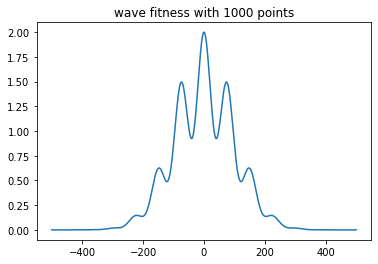

In [6]:
# display fitnerr surface 
# wave fitness :1000points 
# x =[-500,500]
n_points = 1000
x = np.linspace(-500,500,n_points)
y = fitness(x)
plt.plot(x,y)
plt.title('wave fitness with {} points'.format(n_points))
plt.show()

Run the algorithm with an initial X value of 250 and an initial temperature of 10. Plot the trajectory of the annealing algorithm along the fitness surface, Include the graph in your lab report. 
 Slowly increase the temperature until you find the peak about 90% of the time.  
 
Report this temperature and explain its significance in terms of the relationship between the search radius and the dimensions of the width of the fitness curve. 

In [7]:
def simulated_annealing(fitness, initial_state, max_it ,init_temp ,alpha,final_temp):
  
    current_state = initial_state
    # modify to list []
    states = [initial_state]
    costs =[fitness(current_state)]
    t = init_temp
    while(t > final_temp):
        for i in range(1,max_it):
            # make the current_state move left and right 
            perturbation = np.random.uniform(-1,1)
            next_state = current_state + perturbation
            energy_delta = fitness(next_state) - fitness(current_state)
            if ((energy_delta <0) or (np.exp(-energy_delta/t)>np.random.random())):
                current_state = next_state
            costs.append(fitness(current_state))
            states.append(current_state)
        t = alpha*t
    return current_state, states, costs

best fit of the algorithm: 220.93294782658188
cost function at best fit : -0.14746278397948584


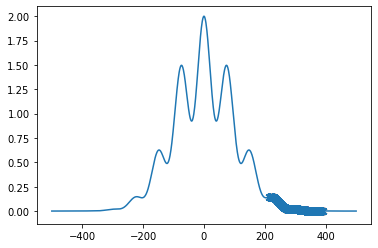

In [27]:
def fit(x):
    return -fitness(x)

res = simulated_annealing(fit, initial_state = 250, max_it =1000,init_temp=10,alpha=.85,final_temp=.00001)
for i in range(50):
    k =np.mean(fitness(res[0])) 
print ("best fit of the algorithm:", res[0])
print ("cost function at best fit :", fitness(res[0]))

plt.plot(x,y)
values = [fitness(state) for state in res[1]]
plt.scatter(res[1],fit(,marker ='x')

best fit of the algorithm: 147.64215355280774
cost function at best fit : 0.6268096230819882


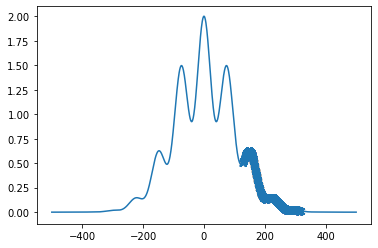

In [19]:
res1 = simulated_annealing(fit, initial_state = 250, max_it =1000,init_temp=20,alpha=.85,final_temp=.00001)

print ("best fit of the algorithm:", res1[0])
print ("cost function at best fit :", fitness(res1[0]))
plt.plot(x,y)
values = [fitness(state) for state in res1[1]]
plt.scatter(res1[1],values,marker ='x')

best fit of the algorithm: 0.04523711845816414
cost function at best fit : -1.9999965211292123


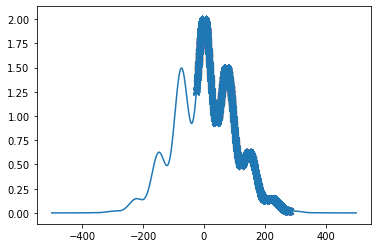

In [20]:
res2 = simulated_annealing(fit, initial_state = 250, max_it =1000,init_temp=45,alpha=.85,final_temp=.00001)

print ("best fit of the algorithm:", res2[0])
print ("cost function at best fit :", fit(res2[0]))
plt.plot(x,y)
values = [fitness(state) for state in res2[1]]
plt.scatter(res2[1],values,marker ='x')

best fit of the algorithm: 147.98896824430528
cost function at best fit : -0.6267374940833693


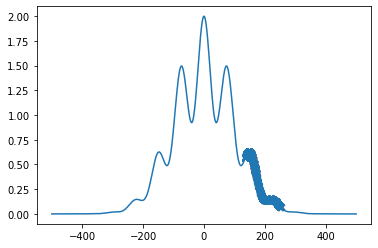

In [21]:
res3 = simulated_annealing(fit, initial_state = 250, max_it =1000,init_temp=30,alpha=.5,final_temp=.0001)
print ("best fit of the algorithm:", res3[0])
print ("cost function at best fit :", fit(res3[0]))
plt.plot(x,y)
values = [fitness(state) for state in res3[1]]
plt.scatter(res3[1],values,marker ='x')

best fit of the algorithm: 220.02589971345066
cost function at best fit : -0.1474239977804934


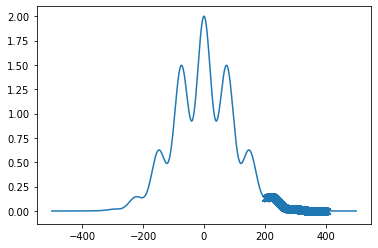

In [22]:
res4 = simulated_annealing(fit, initial_state = 250, max_it =1000,init_temp=40,alpha=.85,final_temp=.0001)
print ("best fit of the algorithm:", res4[0])
print ("cost function at best fit :", fit(res4[0]))
plt.plot(x,y)
values = [fitness(state) for state in res4[1]]
plt.scatter(res4[1],values,marker ='x')

If the temp is set higher, it has bigger search radius and wider dimensions of fitness curve 
As temperature is reduced, it has smaller search radius 


Another informative graph is the plot of all the intermediate best fitnesses versus iteration number.

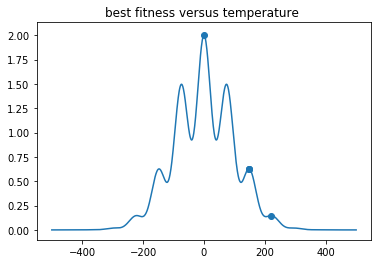

In [23]:
# current fitness for each Teamperature

Temp = [res[0],res1[0],res2[0],res3[0],res4[0]]
y1 =  [fitness(state) for state in list(Temp)]
plt.plot(x,y)
plt.scatter(Temp, y1)
plt.title('best fitness versus temperature ')
plt.show()